In [1]:
# Classer les véhicules dans des classes d'acceptabilité de prix en fonction de leurs caractéristiques

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import os
import sklearn

## Import data

In [3]:
df = pd.read_csv('cars.csv')

## Simple statistics and cleaning if necessary

In [4]:
df.shape

(1728, 7)

In [5]:
df.head(2)

,buying,maint,doors,persons_capacity,luggage_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [6]:
df.describe()

## No missing values, only categorical data

,buying,maint,doors,persons_capacity,luggage_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,4,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [7]:
df["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [8]:
print(df['buying'].value_counts())
df['buying_code'] = df['buying'].replace({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3})
df['buying_code'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64


3    432
2    432
1    432
0    432
Name: buying_code, dtype: int64

In [9]:
print(df['maint'].value_counts())
df['maint_code'] = df['maint'].replace({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3})
df['maint_code'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64


3    432
2    432
1    432
0    432
Name: maint_code, dtype: int64

In [10]:
print(df['doors'].value_counts())
df['doors_code'] = df['doors'].replace({'5more': 5, "2": 2, "3": 3, "4": 4})
df['doors_code'].value_counts()

4        432
5more    432
2        432
3        432
Name: doors, dtype: int64


5    432
4    432
3    432
2    432
Name: doors_code, dtype: int64

In [11]:
print(df['persons_capacity'].value_counts())
df['persons_capacity_code'] = df['persons_capacity'].replace({'more': 6, "2": 2, "4": 4})
df['persons_capacity_code'].value_counts()

4       576
2       576
more    576
Name: persons_capacity, dtype: int64


6    576
4    576
2    576
Name: persons_capacity_code, dtype: int64

In [12]:
df['luggage_boot_code'] = df['luggage_boot'].replace({'small': 1, "med": 2, "big": 3})
df['luggage_boot'].value_counts()

small    576
big      576
med      576
Name: luggage_boot, dtype: int64

In [13]:
df['safety_code'] = df['safety'].replace({'low': 1, "med": 2, "high": 3})
df['safety_code'].value_counts()

3    576
2    576
1    576
Name: safety_code, dtype: int64

In [14]:
df['class_code'] = df['class'].replace({"unacc": 0, 'acc': 1, "good": 2, "vgood": 3})
df['class_code'].value_counts()

0    1210
1     384
2      69
3      65
Name: class_code, dtype: int64

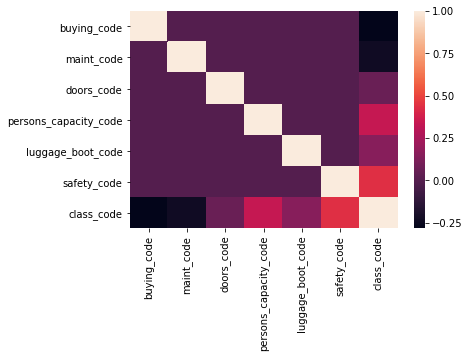

In [15]:
import seaborn as sns
%matplotlib inline

df_code = df[[c for c in list(df.columns) if '_code' in c]]
# calculate the correlation matrix
corr = df_code.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Preparing modelling 
#### choose the model : http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [16]:
X = df[['buying_code', 'maint_code', 'doors_code', 'persons_capacity_code', 'luggage_boot_code', 'safety_code']]
y = df['class_code']

In [17]:
X.describe()

,buying_code,maint_code,doors_code,persons_capacity_code,luggage_boot_code,safety_code
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,3.500000,4.000000,2.000000,2.000000
std,1.118358,1.118358,1.118358,1.633466,0.816733,0.816733
min,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000
25%,0.750000,0.750000,2.750000,2.000000,1.000000,1.000000
50%,1.500000,1.500000,3.500000,4.000000,2.000000,2.000000
75%,2.250000,2.250000,4.250000,6.000000,3.000000,3.000000
max,3.000000,3.000000,5.000000,6.000000,3.000000,3.000000


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Creation of a new value to predict
x_to_predict = pd.DataFrame({'buying_code': {0: 0},  'maint_code': {0: 3}, 'doors_code': {0: 2},
 'persons_capacity_code': {0: 1}, 'luggage_boot_code': {0: 2}, 'safety_code': {0: 2}})
print(x_to_predict)
print(clf.predict(x_to_predict))

   buying_code  doors_code  luggage_boot_code  maint_code  \
0            0           2                  2           3   

   persons_capacity_code  safety_code  
0                      1            2  
[0]


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8439306358381503

In [76]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=2)
scores = cross_val_score(clf, X, y, cv=20)
print(np.mean(scores))

0.8319249168020676


In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, y, cv=20)
print(np.mean(scores))

0.8244793122673653


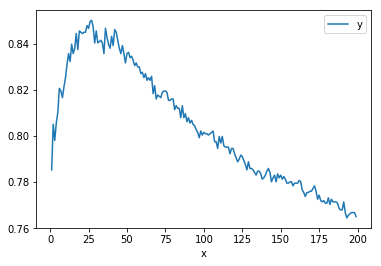

In [87]:
from sklearn.model_selection import cross_val_score
l=[]
for x in range(1,200):
    clf = KNeighborsClassifier(n_neighbors=x)
    scores = cross_val_score(clf, X, y, cv=5)
    l.append({'x':x, 'y': np.mean(scores)})  
tmp = pd.DataFrame(l)
tmp.plot.line('x', 'y')

In [84]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=3)
l=[]
for x in range(3,20):
    scores = cross_val_score(clf, X, y, cv=x)
    l.append({'x':x, 'y': np.mean(scores)})             

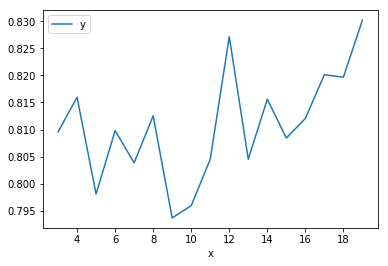

In [82]:
tmp = pd.DataFrame(l)
tmp.plot.line('x', 'y')